In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Save Image Features to Npy File

In [ ]:
import numpy as np
import os

# 공통 경로 변수
base_path = "/content/drive/MyDrive/예비프로젝트_천대원/CNN/feature_extract/train/"

# 각 질병별로 추출한 특징을 담고 있는 여러 개의 넘파이 배열
train_feature_disease1 = np.load(base_path + "결막염_features.npy")
train_feature_disease2 = np.load(base_path + "안검내반증_features.npy")
train_feature_disease3 = np.load(base_path + "궤양성각막질환_features.npy")
train_feature_disease4 = np.load(base_path + "안검염_features.npy")
train_feature_disease5 = np.load(base_path + "백내장_features.npy")
train_feature_disease6 = np.load(base_path + "안검종양_features.npy")
train_feature_disease7 = np.load(base_path + "비궤양성각막질환_features.npy")
train_feature_disease8 = np.load(base_path + "유루증_features.npy")
train_feature_disease9 = np.load(base_path + "색소침착성각막염_features.npy")
train_feature_disease10 = np.load(base_path + "색경화_features.npy")
train_feature_disease11 = np.load(base_path + "무증상_features.npy")

# 넘파이 배열을 하나로 합침
train_all_features = np.concatenate((train_feature_disease1, train_feature_disease2,
                                     train_feature_disease3, train_feature_disease4,
                                     train_feature_disease5, train_feature_disease6,
                                     train_feature_disease7, train_feature_disease8,
                                     train_feature_disease9, train_feature_disease10,
                                     train_feature_disease11), axis=0)

In [ ]:
import numpy as np

# 공통 경로 변수
base_path = "/content/drive/MyDrive/예비프로젝트_천대원/CNN/feature_extract/test/"

# 각 질병별로 추출한 특징을 담고 있는 여러 개의 넘파이 배열
test_feature_disease1 = np.load(base_path + "결막염_features.npy")
test_feature_disease2 = np.load(base_path + "안검내반증_features.npy")
test_feature_disease3 = np.load(base_path + "궤양성각막질환_features.npy")
test_feature_disease4 = np.load(base_path + "안검염_features.npy")
test_feature_disease5 = np.load(base_path + "백내장_features.npy")
test_feature_disease6 = np.load(base_path + "안검종양_features.npy")
test_feature_disease7 = np.load(base_path + "비궤양성각막질환_features.npy")
test_feature_disease8 = np.load(base_path + "유루증_features.npy")
test_feature_disease9 = np.load(base_path + "색소침착성각막염_features.npy")
test_feature_disease10 = np.load(base_path + "색경화_features.npy")
test_feature_disease11 = np.load(base_path + "무증상_features.npy")

# 넘파이 배열을 하나로 합침
test_all_features = np.concatenate((test_feature_disease1, test_feature_disease2,
                                    test_feature_disease3, test_feature_disease4,
                                    test_feature_disease5, test_feature_disease6,
                                    test_feature_disease7, test_feature_disease8,
                                    test_feature_disease9, test_feature_disease10,
                                    test_feature_disease11), axis=0)

In [ ]:
import numpy as np

# 공통 경로 변수
base_path = "/content/drive/MyDrive/예비프로젝트_천대원/CNN/feature_extract/val/"

# 각 질병별로 추출한 특징을 담고 있는 여러 개의 넘파이 배열
val_feature_disease1 = np.load(base_path + "결막염_features.npy")
val_feature_disease2 = np.load(base_path + "안검내반증_features.npy")
val_feature_disease3 = np.load(base_path + "궤양성각막질환_features.npy")
val_feature_disease4 = np.load(base_path + "안검염_features.npy")
val_feature_disease5 = np.load(base_path + "백내장_features.npy")
val_feature_disease6 = np.load(base_path + "안검종양_features.npy")
val_feature_disease7 = np.load(base_path + "비궤양성각막질환_features.npy")
val_feature_disease8 = np.load(base_path + "유루증_features.npy")
val_feature_disease9 = np.load(base_path + "색소침착성각막염_features.npy")
val_feature_disease10 = np.load(base_path + "색경화_features.npy")
val_feature_disease11 = np.load(base_path + "무증상_features.npy")

# 넘파이 배열을 하나로 합침
val_all_features = np.concatenate((val_feature_disease1, val_feature_disease2,
                                   val_feature_disease3, val_feature_disease4,
                                   val_feature_disease5, val_feature_disease6,
                                   val_feature_disease7, val_feature_disease8,
                                   val_feature_disease9, val_feature_disease10,
                                   val_feature_disease11), axis=0)

In [ ]:
all_features = np.concatenate((train_all_features, test_all_features, val_all_features), axis=0)

In [ ]:
np.save('all_features.npy', all_features)

In [ ]:
from google.colab import files

# .npy 파일 다운로드
files.download('all_features.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load Image Features

In [2]:
import numpy as np

# npy 파일에서 모든 이미지 특성 로드
features = np.load('/content/drive/MyDrive/예비프로젝트_천대원/CNN/all_features.npy')

# Load Class Values and Coordinates of Image

In [3]:
import os

def load_labels_and_coords(labels_dir):
    labels = []
    coords = []
    data_types = ['train', 'test', 'val']
    disease_folders = ['결막염', '궤양성각막질환', '무증상', '백내장',
                       '비궤양성각막질환', '색경화', '색소침착성각막염',
                       '안검내반증', '안검염', '안검종양', '유루증']

    for data_type in data_types:
        for disease in disease_folders:
            folder_path = os.path.join(labels_dir, data_type, disease)
            for txt_file in sorted(os.listdir(folder_path)):
                if txt_file.endswith('.txt'):
                    with open(os.path.join(folder_path, txt_file), 'r') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.strip().split()
                            class_value = int(parts[0])  # class value
                            coordinates = list(map(float, parts[1:]))  # class coordinates
                            labels.append(class_value)
                            coords.append(coordinates)

    return np.array(labels), np.array(coords)

# 라벨 디렉토리 경로 설정
labels_dir = '/content/drive/MyDrive/xgboost/labels'

# 라벨 및 좌표 로드
labels, coords = load_labels_and_coords(labels_dir)

# Match Features with Labels & Coordinates

In [ ]:
assert len(features) == len(labels), "Features and labels must have the same length"

In [14]:
# # coords 배열의 길이가 features와 일치하지 않는 경우 features 배열을 잘라냄
if len(coords) != len(features):
    min_length = min(len(features), len(coords))
    features = features[:min_length]
    coords = coords[:min_length]

In [5]:
# labels 배열의 길이가 coords와 일치하지 않는 경우 coords 배열을 기준으로 labels 배열을 잘라냄
if len(labels) != len(coords):
    min_length = min(len(labels), len(coords))
    labels = labels[:min_length]

In [6]:
# CNN 특성을 평탄화
if features.ndim > 2:
    features = features.reshape(features.shape[0], -1)

In [7]:
# 이미지 특성과 클래스 좌표 결합
features_with_coords = np.hstack((features, coords))

In [15]:
# 길이 맞는지 확인
print(len(features), len(labels), len(coords))

36740 36740 36740


# Training XGBOOST MODEL

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from joblib import Parallel, delayed

In [10]:
print(xgb.__version__)

2.0.3


In [11]:
# 데이터셋을 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features_with_coords, labels,
                                                    test_size=0.3,
                                                    random_state=33)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(25718, 8196) (11022, 8196)
(25718,) (11022,)


In [12]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [19]:
params = {'max_depth' : 3,
          'learning_rate' : 0.1,
          "objective" : 'multi:softmax',
          'eval_metric' : 'mlogloss',
          'num_class': len(set(y_train))
          }

num_rounds = 500  # 최대 부스팅 라운드 수

In [20]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]

evals_result = {}

xgb_model = xgb.train(params=params,
                      dtrain=dtrain,
                      num_boost_round=num_rounds,
                      evals=wlist,
                      early_stopping_rounds=100,
                      verbose_eval=True,
                      evals_result=evals_result)

[0]	train-mlogloss:2.33373	eval-mlogloss:2.33625
[1]	train-mlogloss:2.28169	eval-mlogloss:2.28683
[2]	train-mlogloss:2.23695	eval-mlogloss:2.24413
[3]	train-mlogloss:2.19718	eval-mlogloss:2.20658
[4]	train-mlogloss:2.16098	eval-mlogloss:2.17252
[5]	train-mlogloss:2.12854	eval-mlogloss:2.14209
[6]	train-mlogloss:2.09900	eval-mlogloss:2.11411
[7]	train-mlogloss:2.07152	eval-mlogloss:2.08918
[8]	train-mlogloss:2.04574	eval-mlogloss:2.06533
[9]	train-mlogloss:2.02224	eval-mlogloss:2.04363
[10]	train-mlogloss:2.00018	eval-mlogloss:2.02406
[11]	train-mlogloss:1.97966	eval-mlogloss:2.00526
[12]	train-mlogloss:1.96036	eval-mlogloss:1.98829
[13]	train-mlogloss:1.94237	eval-mlogloss:1.97171
[14]	train-mlogloss:1.92495	eval-mlogloss:1.95584
[15]	train-mlogloss:1.90890	eval-mlogloss:1.94200
[16]	train-mlogloss:1.89315	eval-mlogloss:1.92864
[17]	train-mlogloss:1.87881	eval-mlogloss:1.91551
[18]	train-mlogloss:1.86500	eval-mlogloss:1.90358
[19]	train-mlogloss:1.85162	eval-mlogloss:1.89194
[20]	train

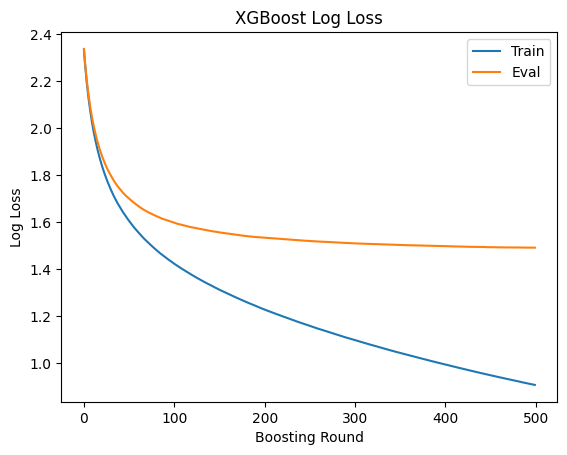

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과를 그래프로 표현
epochs = len(evals_result['train']['mlogloss'])
x_axis = range(0, epochs)

# 그래프 생성
fig, ax = plt.subplots()
ax.plot(x_axis, evals_result['train']['mlogloss'], label='Train')
ax.plot(x_axis, evals_result['eval']['mlogloss'], label='Eval')
ax.legend()
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [21]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 11개 표시, 예측 확률 값으로 표시')
print(np.round(pred_probs[:11], 3))

predict() 수행 결과값을 11개 표시, 예측 확률 값으로 표시
[5. 8. 4. 1. 7. 7. 6. 2. 7. 4. 6.]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# XGBoost 모델 초기화
model = XGBClassifier(use_label_encoder=False,
                      tree_method='gpu_hist',
                      verbosity=1)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'n_estimators': [100, 200],
    'tree_method': ['gpu_hist']  # GPU 가속 사용 설정
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=3,
                           n_jobs=-1)

# GridSearchCV를 사용한 모델 훈련
grid_search.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                eval_metric='mlogloss',
                early_stopping_rounds=100,  # 조기 종료 설정
                verbose=True)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
108 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", l

[0]	validation_0-mlogloss:2.30756	validation_1-mlogloss:2.31940
[1]	validation_0-mlogloss:2.23491	validation_1-mlogloss:2.25851
[2]	validation_0-mlogloss:2.17018	validation_1-mlogloss:2.20421
[3]	validation_0-mlogloss:2.11522	validation_1-mlogloss:2.15855
[4]	validation_0-mlogloss:2.06381	validation_1-mlogloss:2.11707
[5]	validation_0-mlogloss:2.01840	validation_1-mlogloss:2.08126
[6]	validation_0-mlogloss:1.97671	validation_1-mlogloss:2.04853
[7]	validation_0-mlogloss:1.93878	validation_1-mlogloss:2.01949
[8]	validation_0-mlogloss:1.90349	validation_1-mlogloss:1.99198
[9]	validation_0-mlogloss:1.87118	validation_1-mlogloss:1.96740
[10]	validation_0-mlogloss:1.83973	validation_1-mlogloss:1.94436
[11]	validation_0-mlogloss:1.81043	validation_1-mlogloss:1.92309
[12]	validation_0-mlogloss:1.78340	validation_1-mlogloss:1.90333
[13]	validation_0-mlogloss:1.75748	validation_1-mlogloss:1.88515
[14]	validation_0-mlogloss:1.73320	validation_1-mlogloss:1.86740
[15]	validation_0-mlogloss:1.71036	

In [61]:
# 도출된 최적의 하이퍼파라미터로 최종 모델 학습 (n_estimators=500으로 설정)
params = {'learning_rate' : 0.1,
          'max_depth' : 5,
          'min_child_weight' : 3,
          'subsample' : 0.8,
          'colsample_bytree' : 0.8,
          'n_estimators' : 500,
          }

final_model = XGBClassifier(use_label_encoder=False,
                            tree_method='gpu_hist',
                            verbosity=1,
                            **params)

final_model.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                eval_metric=['mlogloss', 'merror'], # 1 - merror = accuracy
                early_stopping_rounds=50,
                verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:08:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:2.30756	validation_0-merror:0.61836	validation_1-mlogloss:2.31940	validation_1-merror:0.67320
[1]	validation_0-mlogloss:2.23491	validation_0-merror:0.57839	validation_1-mlogloss:2.25851	validation_1-merror:0.64643
[2]	validation_0-mlogloss:2.17018	validation_0-merror:0.55568	validation_1-mlogloss:2.20421	validation_1-merror:0.63328
[3]	validation_0-mlogloss:2.11522	validation_0-merror:0.54242	validation_1-mlogloss:2.15855	validation_1-merror:0.62529
[4]	validation_0-mlogloss:2.06381	validation_0-merror:0.52835	validation_1-mlogloss:2.11707	validation_1-merror:0.61922
[5]	validation_0-mlogloss:2.01840	validation_0-merror:0.52053	validation_1-mlogloss:2.08126	validation_1-merror:0.61232
[6]	validation_0-mlogloss:1.97671	validation_0-merror:0.51163	validation_1-mlogloss:2.04853	validation_1-merror:0.60905
[7]	validation_0-mlogloss:1.93878	validation_0-merror:0.50622	validation_1-mlogloss:2.01949	validation_1-merror:0.60597
[8]	validation_0-mlogloss:1.90349	valida

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

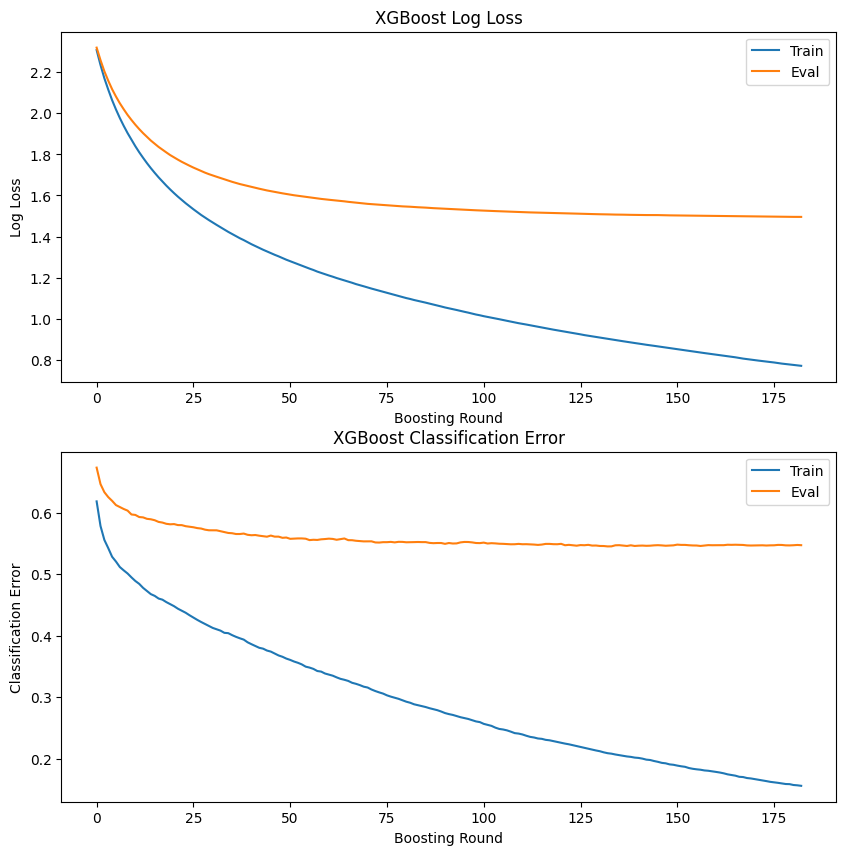

In [62]:
import matplotlib.pyplot as plt

# 모델 성능 평가 및 결과 시각화
evals_result = final_model.evals_result()

# 학습 결과를 그래프로 표현
epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# 그래프 생성
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Log Loss 그래프
ax[0].plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
ax[0].plot(x_axis, evals_result['validation_1']['mlogloss'], label='Eval')
ax[0].legend()
ax[0].set_xlabel('Boosting Round')
ax[0].set_ylabel('Log Loss')
ax[0].set_title('XGBoost Log Loss')

# Classification Error (merror) 그래프
ax[1].plot(x_axis, evals_result['validation_0']['merror'], label='Train')
ax[1].plot(x_axis, evals_result['validation_1']['merror'], label='Eval')
ax[1].legend()
ax[1].set_xlabel('Boosting Round')
ax[1].set_ylabel('Classification Error')
ax[1].set_title('XGBoost Classification Error')

plt.show()

# Model Evaluation

In [63]:
from sklearn.metrics import accuracy_score, f1_score

# 최적의 모델로 테스트 데이터 예측
y_pred = final_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:11:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Accuracy: 0.454817637452368
F1 Score: 0.450092205701764


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 모델 예측값 계산
y_pred = final_model.predict(X_test)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(accuracy))

# 정밀도 계산 (다중 클래스의 경우 'weighted' 평균 사용)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: {:.4f}".format(precision))

# 재현율 계산 (다중 클래스의 경우 'weighted' 평균 사용)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: {:.4f}".format(recall))

# F1 점수 계산 (다중 클래스의 경우 'weighted' 평균 사용)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: {:.4f}".format(f1))

Confusion Matrix:
[[227  17  41  99  52 117 103   8 198  62  75]
 [  3 589 109  26  67  62  33  51  15  31   7]
 [ 16 133 524  42  60  54  73  50  14  54  12]
 [ 78  22  17 351  33 119  66   7 142  87  81]
 [ 48 146  88  42 332 109  62  10  32 125  13]
 [ 61  21  55  88  81 377 134   7  82  83  14]
 [ 95  33  64  62  55 171 372   3  66  76  45]
 [  0  35  40   6   1   2   2 872   1   2  40]
 [150  17  21 145  30 112  80   2 243  53  97]
 [ 27  19  42  69 133  99  53   5  30 524  21]
 [ 47   9  12  51  19  21  15  88  68  38 602]]
Accuracy: 0.4548
Precision: 0.4482
Recall: 0.4548
F1 Score: 0.4501


# Visualization

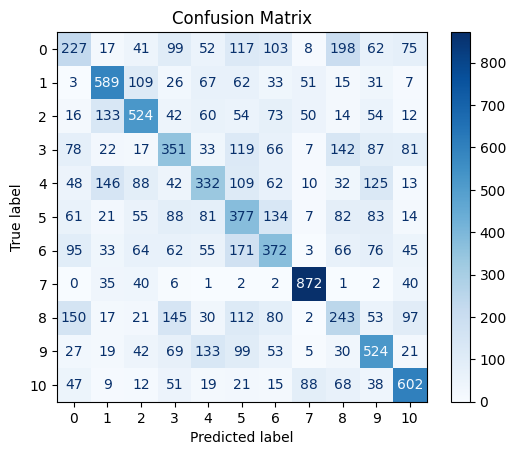

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

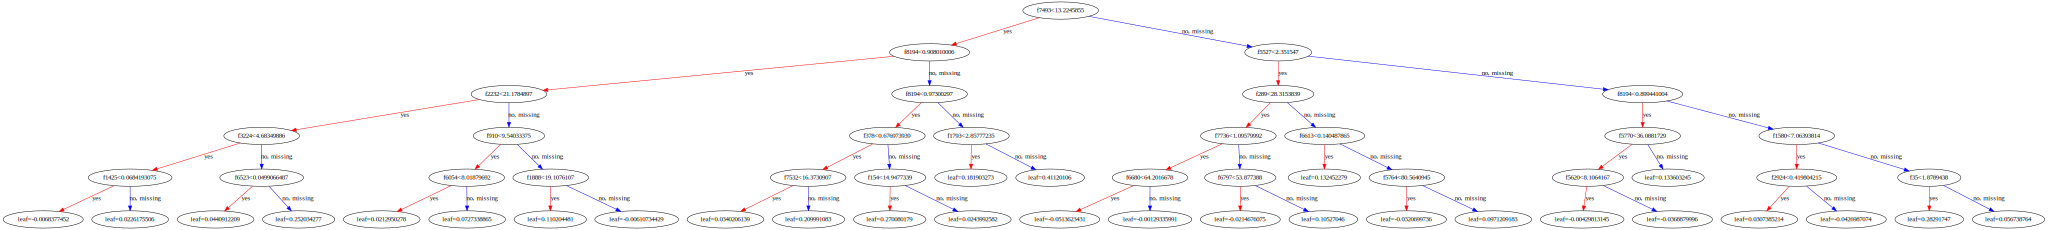

In [45]:
from xgboost import to_graphviz

# XGBoost의 트리 시각화
# 시각화할 트리의 인덱스를 지정합니다.
tree_index = 0  # 시각화할 트리의 인덱스 (원하는 트리의 인덱스로 변경 가능)

# 트리를 Graphviz 형식으로 변환
xgb.to_graphviz(final_model, num_trees=tree_index)

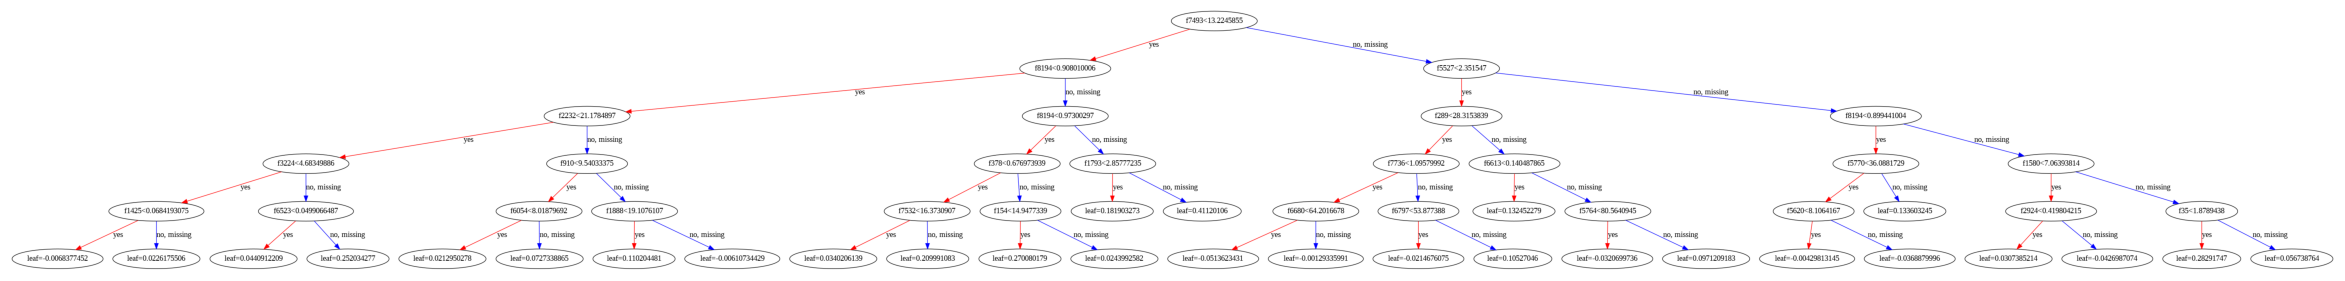

In [53]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# 트리 시각화
fig, ax = plt.subplots(figsize=(30, 30))  # 크기 조절을 위해 Figure와 Axes 객체 생성
plot_tree(final_model, num_trees=0, ax=ax)  # num_trees는 시각화할 트리의 인덱스입니다.

# 시각화된 트리를 이미지 파일로 저장
plt.savefig('tree_visualization.png')